In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [53]:
student_data = pd.read_csv("dataset/Student_Performance.csv", dtype = {'Performance Index':'int64'})
student_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [7]:
student_data["Performance Index"].value_counts()

Performance Index
67     187
45     185
56     181
49     181
40     180
      ... 
14       7
99       6
11       5
100      3
10       1
Name: count, Length: 91, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [76]:
features = ["Hours Studied", "Previous Scores", "Sample Question Papers Practiced"]
X = student_data[features]
y = student_data["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = L.predict(X_test)

In [103]:
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)
print("R2 score: ", r2s)
print("Mean Squared Error: ", mse)

R2 score:  0.9868792226097673
Mean Squared Error:  4.862364811169538


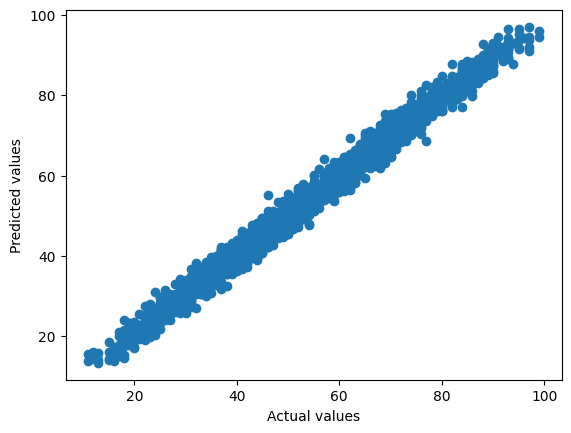

In [82]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()


In [86]:
from sklearn.linear_model import Ridge
R=Ridge(alpha = 0.0001)

In [88]:
R.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [89]:
y_pred1 = R.predict(X_test)

In [90]:
print("R2 score: ", r2_score(y_test, y_pred1))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred1))

R2 score:  0.9868792226101292
Mean Squared Error:  4.86236481103544


In [92]:
def getPrediction(hours_studied, prev_scores, sample_ques_practiced):
    data = np.column_stack((hours_studied, prev_scores, sample_ques_practiced))
    pred = L.predict(data)
    pred = int(pred)
    return pred

In [97]:
print(getPrediction(4,93,1))

75


D:\AllMyCode\ML\StudentPerformance\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
